In [1]:
%pip install ultralytics
import ultralytics
ultralytics.checks()


Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.4/112.6 GB disk)


In [2]:
!nvidia-smi

Tue Feb 18 16:56:40 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   42C    P8             10W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
import os
HOME = os.getcwd()
print(HOME)


/content


In [4]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.4/112.6 GB disk)


In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
100% 6.25M/6.25M [00:00<00:00, 96.4MB/s]
Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

100% 104k/104k [00:00<00:00, 73.8MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 39.3ms
Speed: 11.9ms preprocess, 39.3ms inference, 395.2ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [6]:
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow==1.1.48 --quiet
from roboflow import Roboflow
rf = Roboflow(api_key="fe8w2ACe10Iyc6GP6mkW")
project = rf.workspace("gozdes-projects").project("dental-x-ray-1imfs")
version = project.version(1)
dataset = version.download("yolov11")


/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 3.2 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Dental-X-ray-1 in yolov11:: 100%|██████████| 2162/2162 [00:00<00:00, 8394.99it/s]


In [7]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 112MB/s] 
New https://pypi.org/project/ultralytics/8.3.76 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Dental-X-ray-1/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False

/content


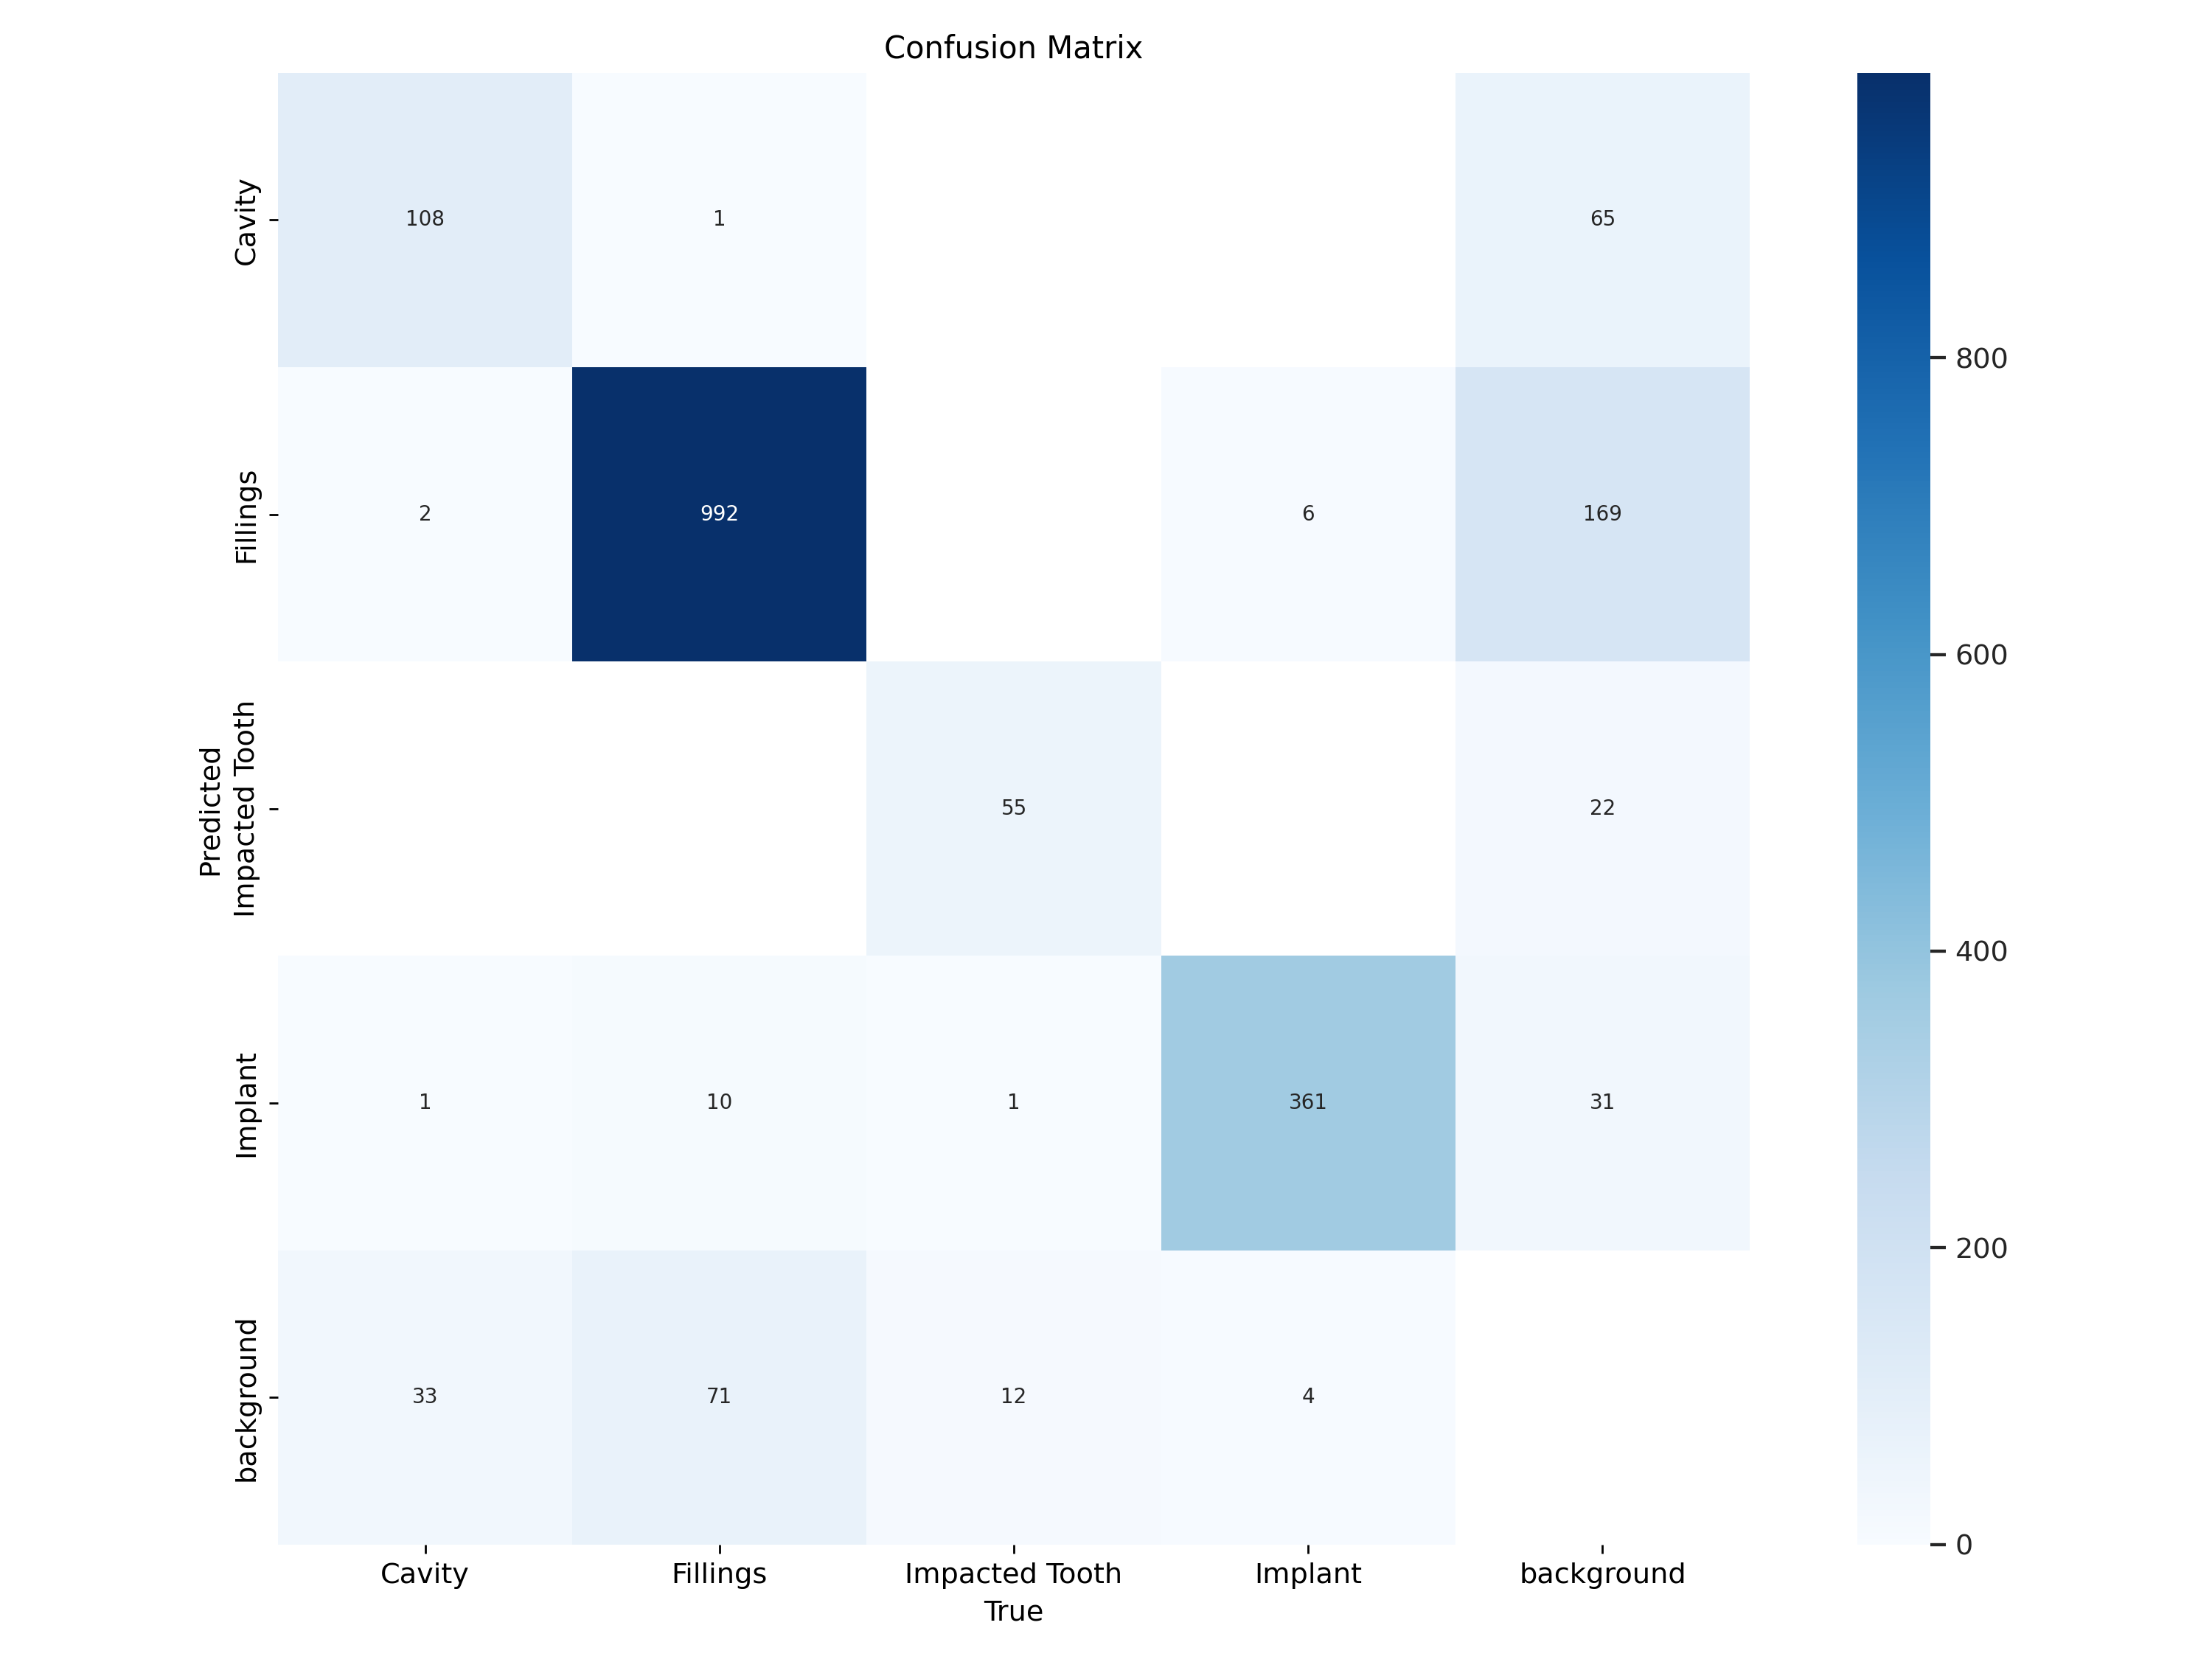

In [8]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


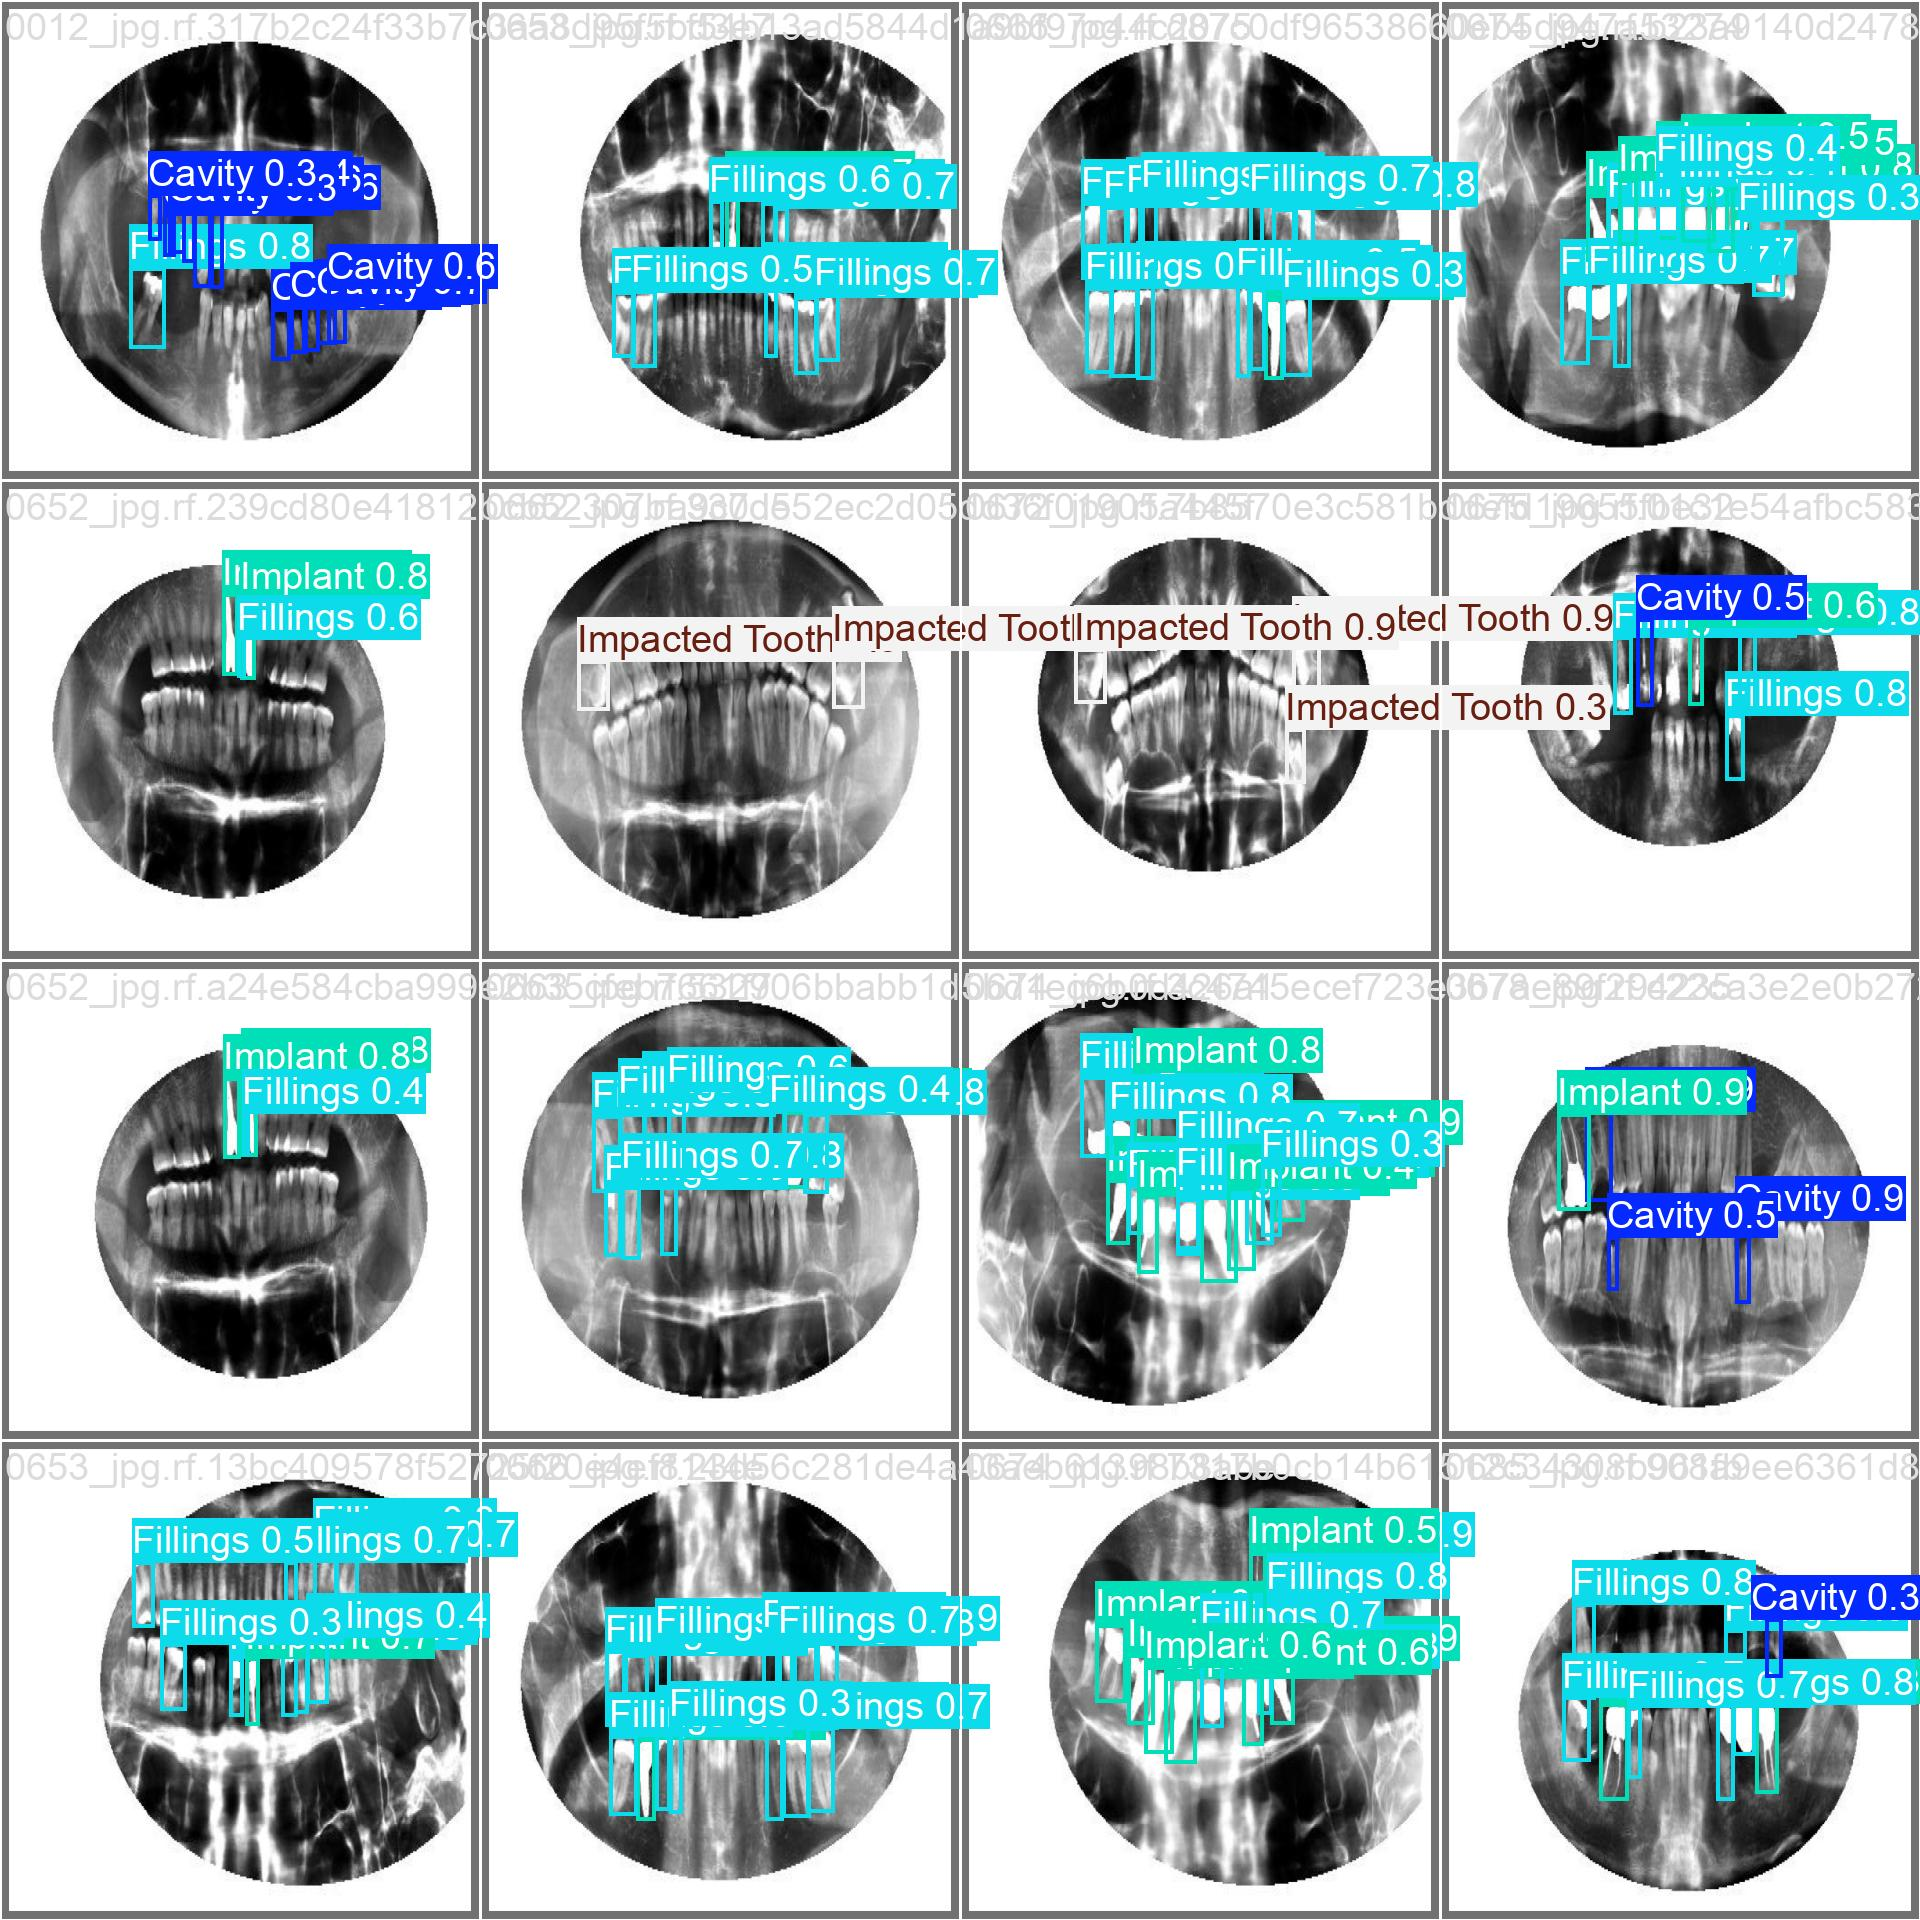

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [10]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Dental-X-ray-1/valid/labels.cache... 215 images, 0 backgrounds, 0 corrupt: 100% 215/215 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 14/14 [00:07<00:00,  1.93it/s]
                   all        215       1657      0.858      0.798      0.886      0.625
                Cavity         49        144      0.772      0.635      0.757      0.488
              Fillings        175       1074       0.92      0.853      0.949      0.654
        Impacted Tooth         42         68      0.808      0.741      0.866      0.655
               Implant        118        371      0.934      0.962       0.97      0.703
Speed: 4.8ms preprocess, 13.5ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/

In [11]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs

image 1/107 /content/datasets/Dental-X-ray-1/test/images/0002_jpg.rf.cec49076769bb88c1033a7a6f9c44122.jpg: 800x800 3 Fillingss, 22.8ms
image 2/107 /content/datasets/Dental-X-ray-1/test/images/0006_jpg.rf.f76d9a750c3ca0fb732dcdfc763282e3.jpg: 800x800 4 Fillingss, 22.9ms
image 3/107 /content/datasets/Dental-X-ray-1/test/images/0010_jpg.rf.fc353845a6614b0ad4a0b407f3b5bbdf.jpg: 800x800 8 Fillingss, 2 Implants, 22.8ms
image 4/107 /content/datasets/Dental-X-ray-1/test/images/0017_jpg.rf.17a2370fb6321030f9531b2f19f2ac41.jpg: 800x800 3 Fillingss, 2 Implants, 22.8ms
image 5/107 /content/datasets/Dental-X-ray-1/test/images/0024_jpg.rf.e794d266b6f604461d78c92f65062b41.jpg: 800x800 2 Implants, 22.8ms
image 6/107 /content/datasets/Dental-X-ray-1/test/images/0027_jpg.rf.ab8c1ebedec7c35309c76334720305b6.jpg: 800x800 6 Fill

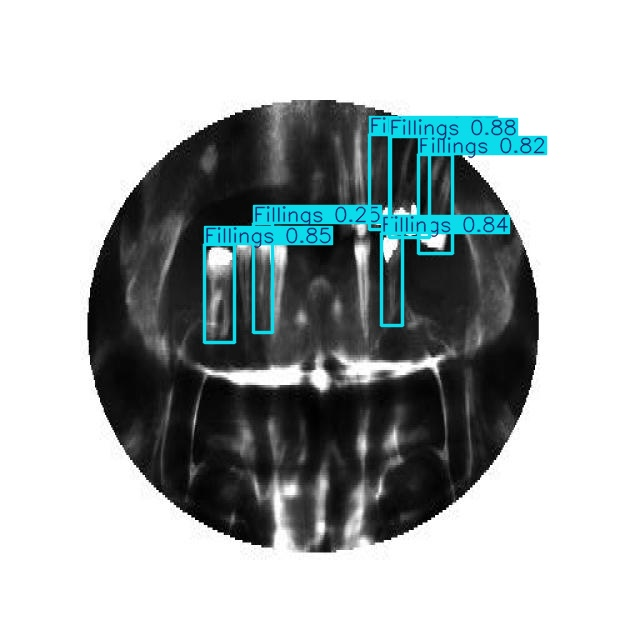

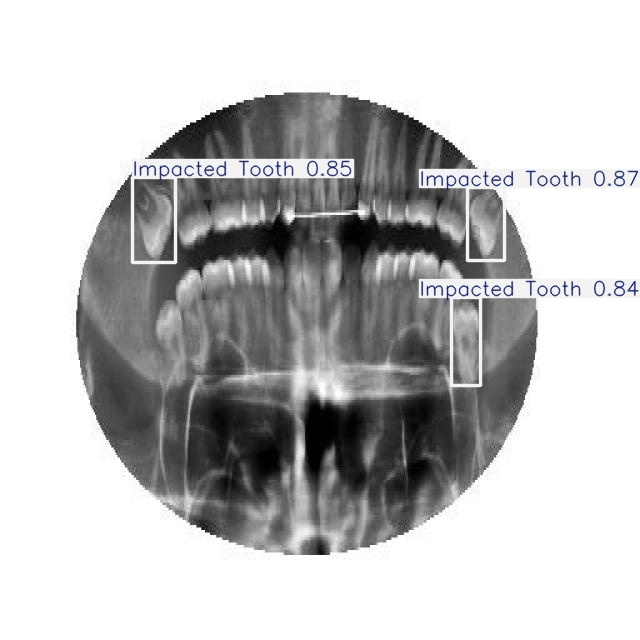

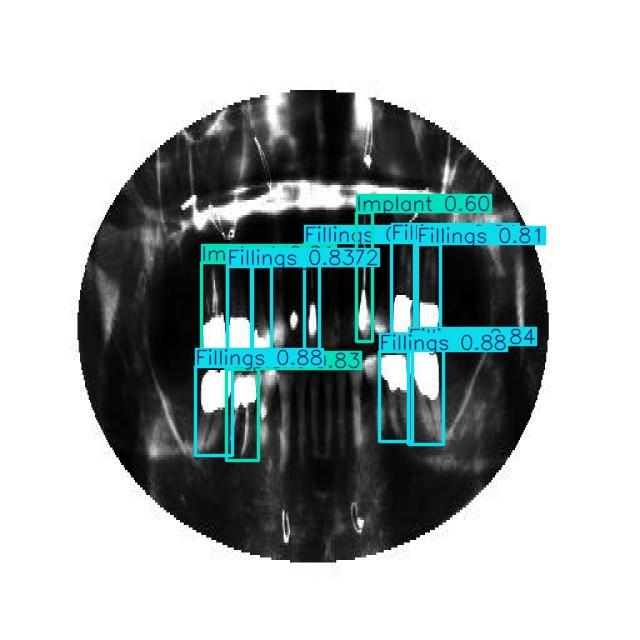

In [12]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")